# Data Visualization
Kita gunakan contoh data imigrasi tahun 1980-2013 dari negara2 lain ke Canada sebagai contoh data hari ini.

Tujuan kita adalah untuk membuat visualisasi (graph) yang memberi insight ke datanya.

Misalkan, biasanya Indonesia kirim berapa orang ke Canada? kalau ASEAN? berapa persentasi imigran Canada yang dari Indonesia kalau dari ASEAN? Apakaha Singapore lebih banyak?

Ada beberapa jenis grafik yang mau kita bahas:
- Line Chart
- Bar Chart
- Area Plot
- Pie Chart
- Scatter Plot
- Histogram
- Box Plot


In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# optional, minta style grafik yang berbeda
plt.style.use("ggplot")

untuk melihat ada style grafik apa saja bisa ke https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py

In [ ]:
# import data
# df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
df_can = pd.read_excel("Canada.xlsx",
                        sheet_name="Canada by Citizenship",
                        skiprows=20,
                        skipfooter=2)
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


setelah berhasil import data, kita bisa lakukan "data cleaning" dan "data exploration"

data cleaning - hilangkan/ handle missing values, handle outlier, invalid values (data type)

data exploration - mencoba mengerti datanya, mencari informasi, mencari korelasi

di contoh ini, misalkan kita mau cari tren imigrasi dari Indonesia ke Canada - kita gunakan line chart

In [ ]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [ ]:
df_can.isnull().sum().sum()

0

data ini tidak ada missing values

tipe data per kolom sudah sesuai

kita lanjut ke bagian data explorasi dengan pertanyaan kita tadi - tren imigrasi dari Indonesia ke Canada

In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can[df_can['OdName'] == 'Indonesia']

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
80,Immigrants,Foreigners,Indonesia,935,Asia,920,South-Eastern Asia,902,Developing regions,186,...,552,632,613,657,661,504,712,390,395,387


In [ ]:
# ubah judul kolom jadi lebih mudah diingat, OdName - Country, dan lainnya
df_can2 = df_can.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"})
df_can2.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# drop kolom yang tidak terpakai
df_can2 = df_can2.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV", "DevName"])
df_can2.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# gunakan Country sebagai index
df_can2 = df_can2.set_index("Country")
df_can2.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# ambil data 1 negara menjadi mudah, kita pakai .loc
df_indo = df_can2.loc[["Indonesia"]]
df_indo

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387


In [ ]:
# kita akan sering minta data yang numerik nya saja, bukan Continent atau Region
# jadi kita bisa buat shortcut untuk minta kolom2 tahun saja
years = range(1980,2014)

df_indo[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387


sebelum dijadikan grafik, kita perlu perhatikan kalau line chart membuat 1 line per kolom

1 line per kolom --> kalau mau ada line untuk Indonesia, maka Indonesia harus jadi kolomnya, bukan row tapi column

# Line Chart

In [ ]:
df_indo = df_indo[years].T
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


<Axes: >

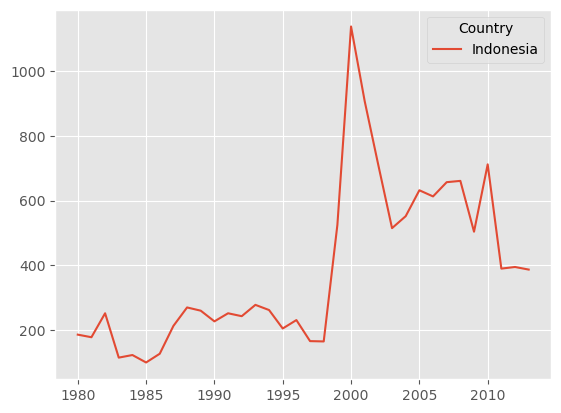

In [ ]:
df_indo.plot()

Kita dapat sebuah *Line Chart* yang menunjukkan jumlah imigran Indonesia yang masuk ke Canada per tahunnya, dari 1980 sampai 2013

<Axes: >

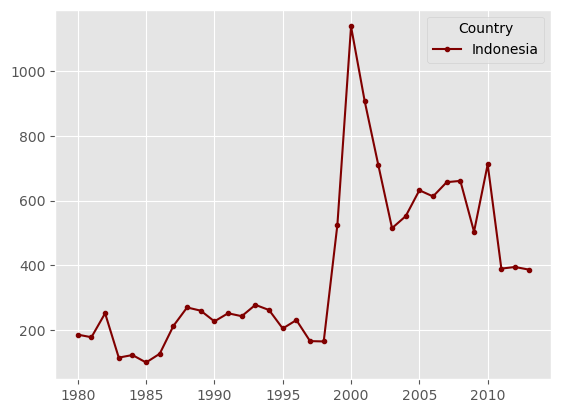

In [ ]:
# kita bisa percantik plot nya menggunakan opsi2 optional
df_indo.plot(kind="line", marker=".", color="maroon")

<Axes: >

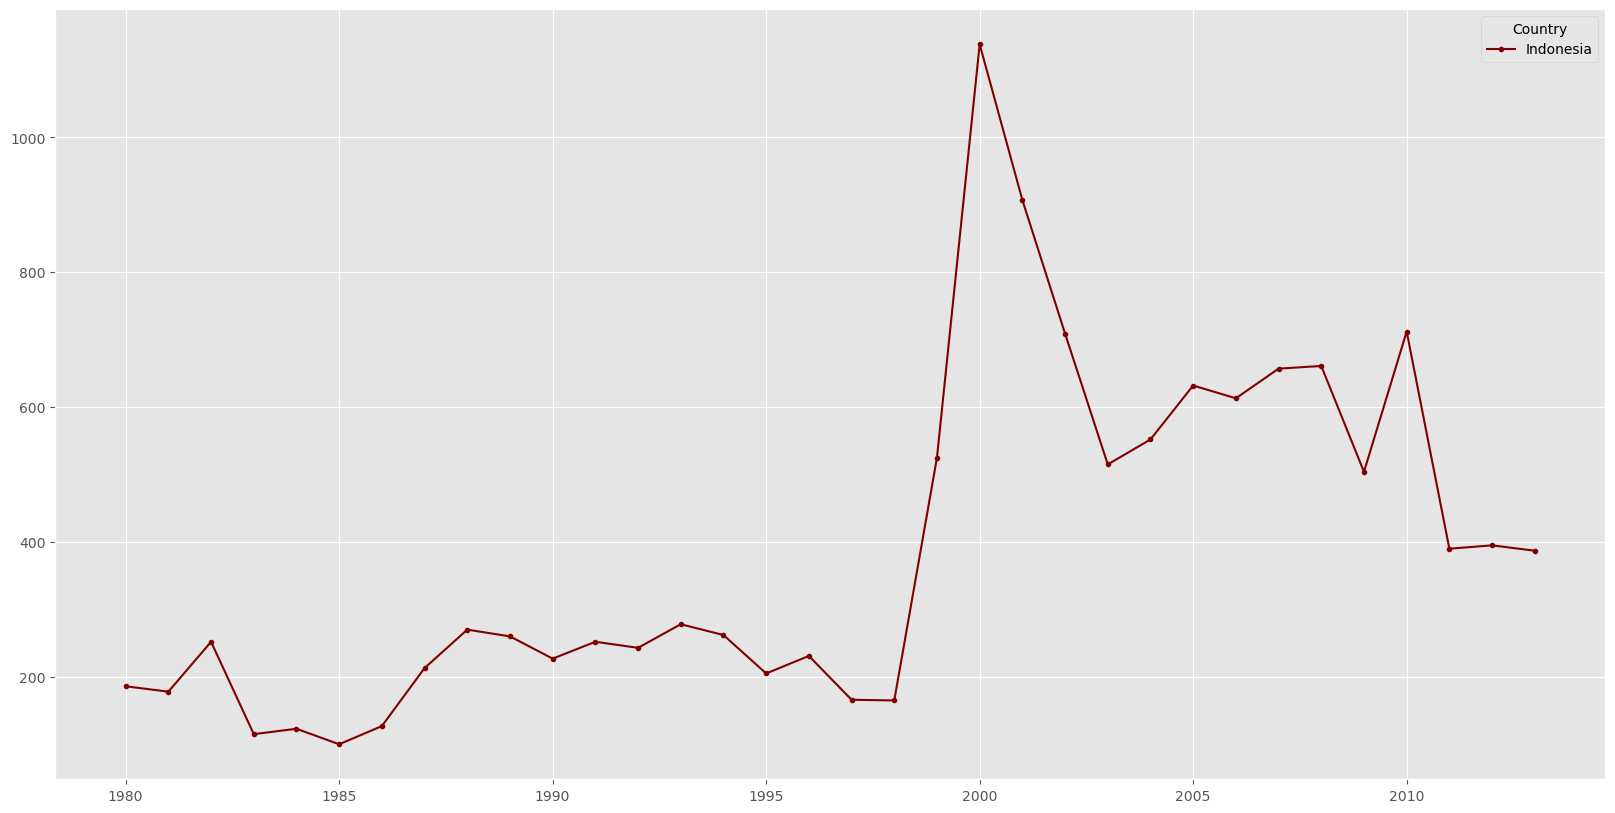

In [ ]:
# ganti ukuran
df_indo.plot(kind="line", marker=".", color="maroon", figsize=(20,10))

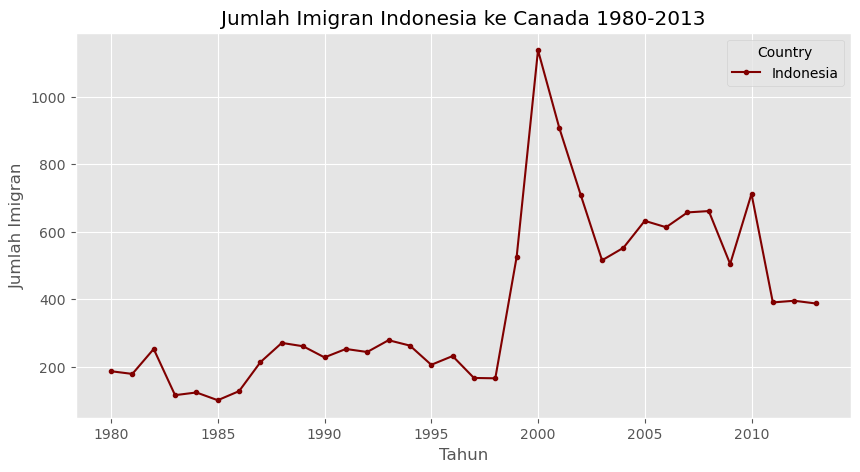

In [ ]:
# nambah title, label axis
df_indo.plot(kind="line",
             marker=".",
             color="maroon",
             figsize=(10,5)
             )

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran Indonesia ke Canada 1980-2013")
plt.show()

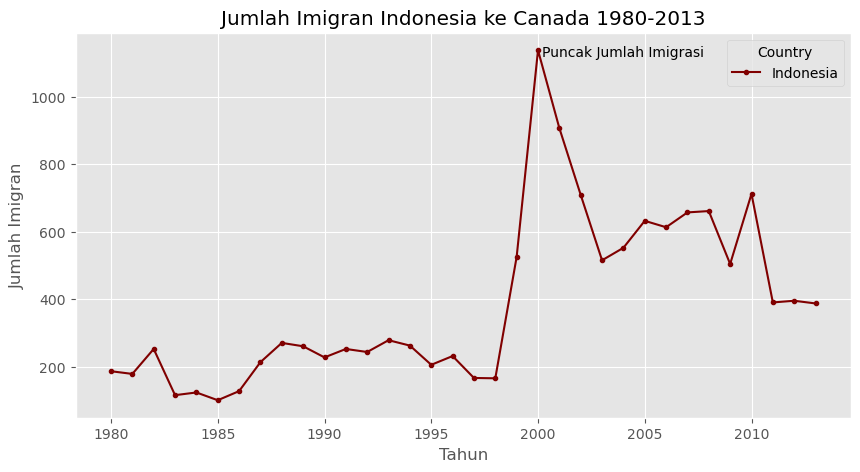

In [ ]:
# nambah text di grafiknya

df_indo.plot(kind="line",
             marker=".",
             color="maroon",
             figsize=(10,5)
             )

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran Indonesia ke Canada 1980-2013")

plt.text(20.2, 1120, "Puncak Jumlah Imigrasi")
plt.show()

Jumlah imigran Indonesia yang masuk ke Canada relatif stabil di 200an orang per tahunnya sejak 1980 - 1997 lalu terjadi kenaikan drastis sampai ke puncaknya di tahun 2000, dimana sebanyak 1100+ orang Indonesia pindah ke Canada. Setelah itu jumlah imigran menurun pelan pelan ke jumlah yang lebih tinggi dari sebelumnya di sekitar 600 orang per tahun.

# Bar Chart

data yang sama bisa kita plot menggunakan bar chart.

dengan bar chart kita bisa melihat proporsi perubahan datanya.

kita juga bisa gunakan bar chart untuk membandingkan beberapa kategori berbeda. misalnya, jumlah imigran Indonesia vs Singapore.

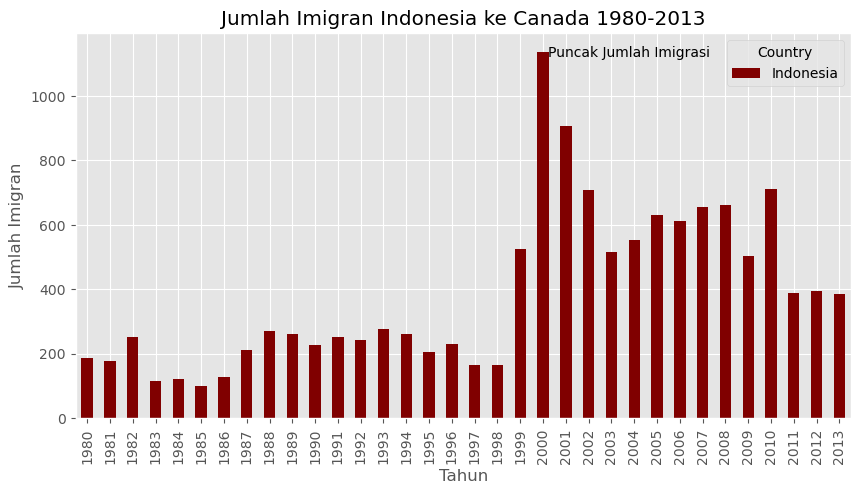

In [ ]:
df_indo.plot(kind="bar",
             color="maroon",
             figsize=(10,5)
             )

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran Indonesia ke Canada 1980-2013")

plt.text(20.2, 1120, "Puncak Jumlah Imigrasi")
plt.show()

line chart selalu bisa diubah ke bar chart.

tapi bar chart belum tentu masuk akal kalau diubah ke line chart. contohnya perbandingan jumlah imigran Indonesia vs Singapore:

In [ ]:
df_indosg = df_can2.loc[["Indonesia", "Singapore"], years].T
df_indosg.head()

Country,Indonesia,Singapore
1980,186,241
1981,178,301
1982,252,337
1983,115,169
1984,123,128


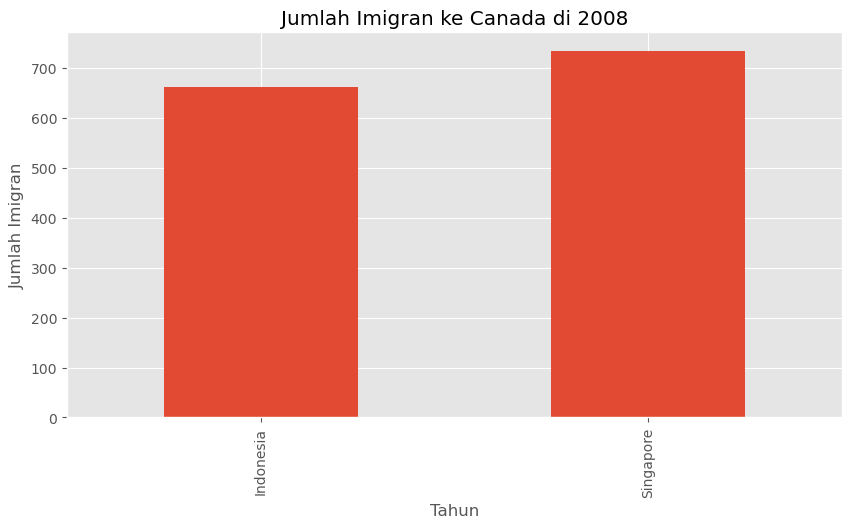

In [ ]:
df_indosg.loc[2008].plot(kind="bar",
             figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada di 2008")
plt.show()

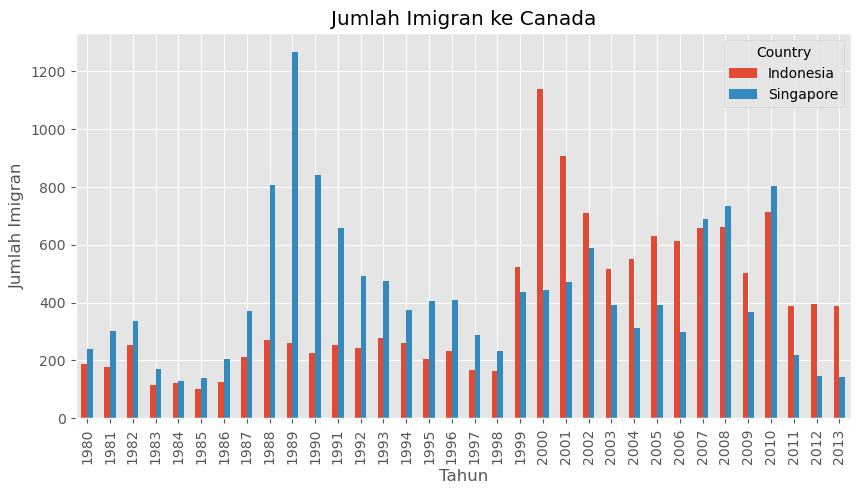

In [ ]:
df_indosg.plot(kind="bar" ,
             figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada")
plt.show()

cari insight

lihat tren yang terjadi, tambahkan informasi dari source lain yang relevan, tambah text di grafik, sesuaikan dengan tujuan analisa data

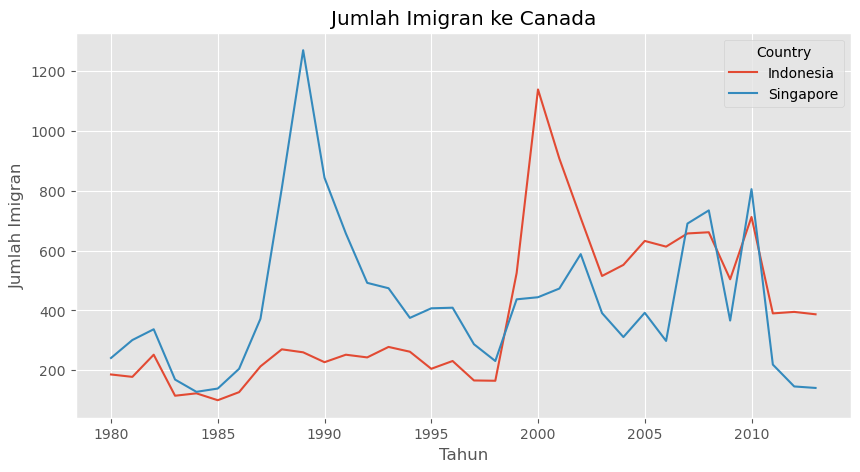

In [ ]:
df_indosg.plot(kind="line",
             figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada")
plt.show()

# Area Plot
area plot adalah gabungan line chart dan bar chart, dimana dia berbentuk line plot tapi diwarnai penuh area di bawah line nya sampai ke nilai y-axis 0

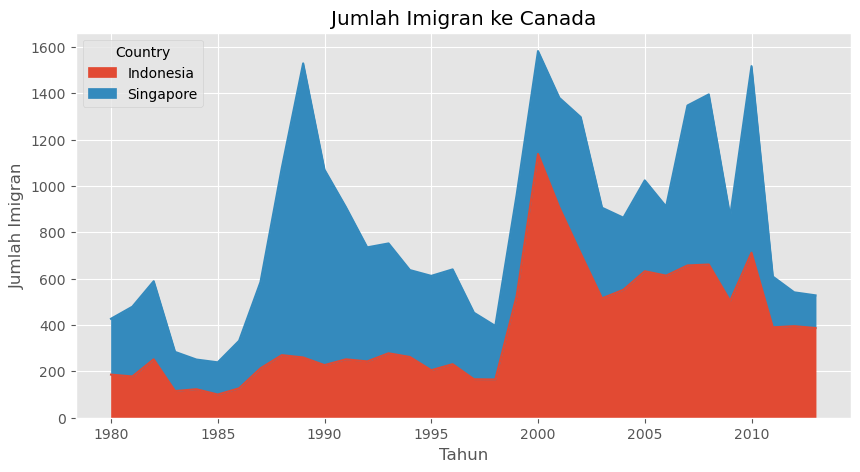

In [ ]:
df_indosg.plot(kind="area",
             figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada")
plt.show()

tujuan area chart umumnya untuk bisa melihat tren kumulatif (total) dari beberapa kategori.

contohnya, di graph di atas, kita bisa lihat total imigrasi kedua negara

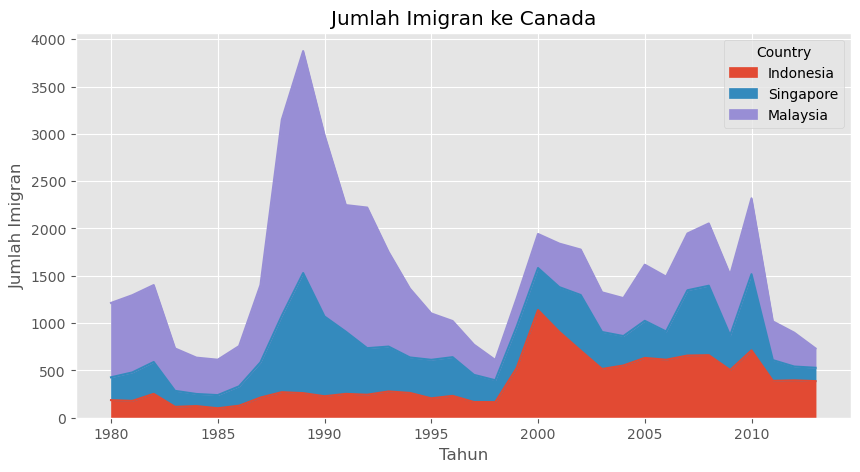

In [ ]:
# misalkan indo sg my
df_indosgmy = df_can2.loc[["Indonesia", "Singapore", "Malaysia"], years].T

df_indosgmy.plot(kind="area",
             figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada")
plt.show()

kalau tidak mau kumulatif juga bisa, tambahkan opsi stacke=False

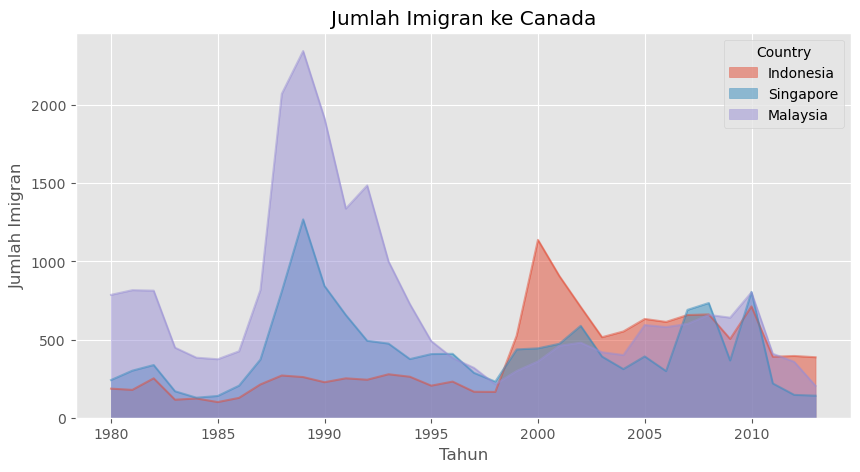

In [ ]:
# misalkan indo sg my
df_indosgmy.plot(kind="area",
                 stacked=False,
                 figsize=(10,5))

plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.title("Jumlah Imigran ke Canada")
plt.show()

# Pie Chart
untuk Pie Chart, dia mirip seperti bar chart yang membandingkan kategori, tapi dia max untuk 8 kategori

Pie Chart digunakan untuk memberi konteks proporsi per kategori. Dari 100%, berapa banyak yang merupakan bagian A, atau bagian B.

Contohnya untuk data kita, kita bisa minta dari ASEAN (10 negara), berapa proporsi imigran yang pindah dari negara negara ASEAN ke Canada selama 1980-2013 (total imigrasi)

cara buat pie chart seperti ini:
1. kita rangkum dulu datanya, total imigran, untuk daerah ASEAN, masing masing per negara
2. buat chart

In [ ]:
df_can2.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# Continent Asia ada Region apa saja
df_asia = df_can2[df_can2['Continent'] == "Asia"]
df_asia.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Armenia,Asia,Western Asia,0,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
Azerbaijan,Asia,Western Asia,0,0,0,0,0,0,0,0,...,230,359,236,203,125,165,209,138,161,57
Bahrain,Asia,Western Asia,0,2,1,1,1,3,0,2,...,12,12,12,22,9,35,28,21,39,32
Bangladesh,Asia,Southern Asia,83,84,86,81,98,92,486,503,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


In [ ]:
df_asia['Region'].unique()

array(['Southern Asia', 'Western Asia', 'South-Eastern Asia',
       'Eastern Asia', 'Central Asia'], dtype=object)

In [ ]:
# untuk ASEAN, kita ambil Region "South-Eastern Asia"
df_asean = df_asia[df_asia['Region'] == "South-Eastern Asia"]
df_asean

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,79,6,8,2,2,4,12,16,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,12,19,26,33,10,7,8,14,...,348,370,529,460,354,203,200,196,233,288
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,Asia,South-Eastern Asia,11,6,16,16,7,17,21,20,...,38,42,74,53,32,39,54,22,25,15
Malaysia,Asia,South-Eastern Asia,786,816,813,448,384,374,425,817,...,401,593,580,600,658,640,802,409,358,204
Myanmar,Asia,South-Eastern Asia,80,62,46,31,41,23,18,33,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,Asia,South-Eastern Asia,241,301,337,169,128,139,205,372,...,311,392,298,690,734,366,805,219,146,141
Thailand,Asia,South-Eastern Asia,56,53,113,65,82,66,78,117,...,392,575,500,487,519,512,499,396,296,400


In [ ]:
df_asean = df_asean[years].T
df_asean

Country,Brunei Darussalam,Cambodia,Indonesia,Lao People's Democratic Republic,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
1980,79,12,186,11,786,80,6051,241,56,1191
1981,6,19,178,6,816,62,5921,301,53,1829
1982,8,26,252,16,813,46,5249,337,113,2162
1983,2,33,115,16,448,31,4562,169,65,3404
1984,2,10,123,7,384,41,3801,128,82,7583
1985,4,7,100,17,374,23,3150,139,66,5907
1986,12,8,127,21,425,18,4166,205,78,2741
1987,16,14,213,20,817,33,7360,372,117,1406
1988,103,15,270,22,2072,55,8639,808,147,1411
1989,63,27,260,44,2346,77,11865,1269,177,3004


<Axes: >

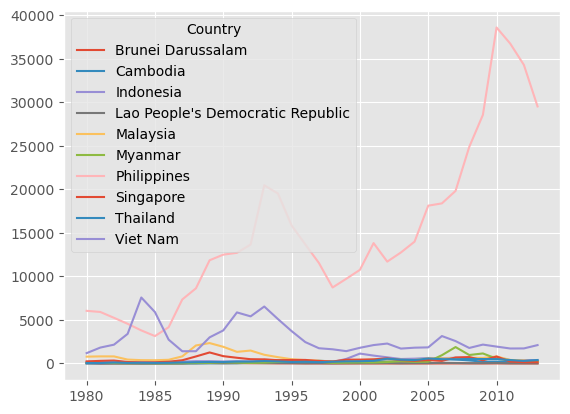

In [ ]:
# plot line chart
df_asean.plot()

In [ ]:
# untuk pie chart kita perlu 1 angka per kategori, bukan banyak angka seperti line chart
# 1 angka per negara
# kita perlu totalin dulu
df_asean_total = df_asean.sum()

df_asean_total

Country
Brunei Darussalam                      600
Cambodia                              6538
Indonesia                            13150
Lao People's Democratic Republic      1089
Malaysia                             24417
Myanmar                               9245
Philippines                         511391
Singapore                            14579
Thailand                              9174
Viet Nam                             97146
dtype: int64

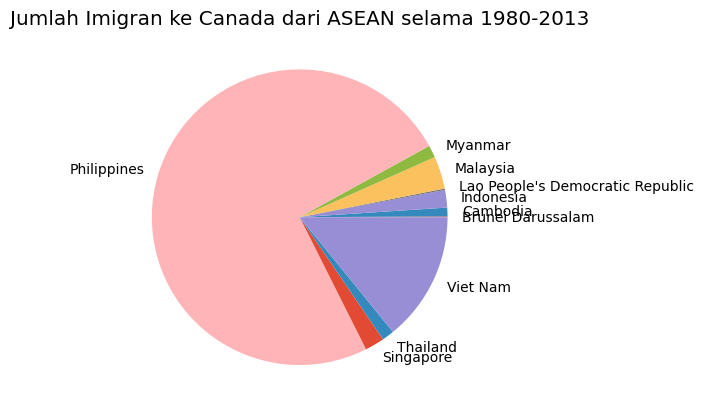

In [ ]:
df_asean_total.plot(kind="pie")

plt.title("Jumlah Imigran ke Canada dari ASEAN selama 1980-2013")
plt.show()

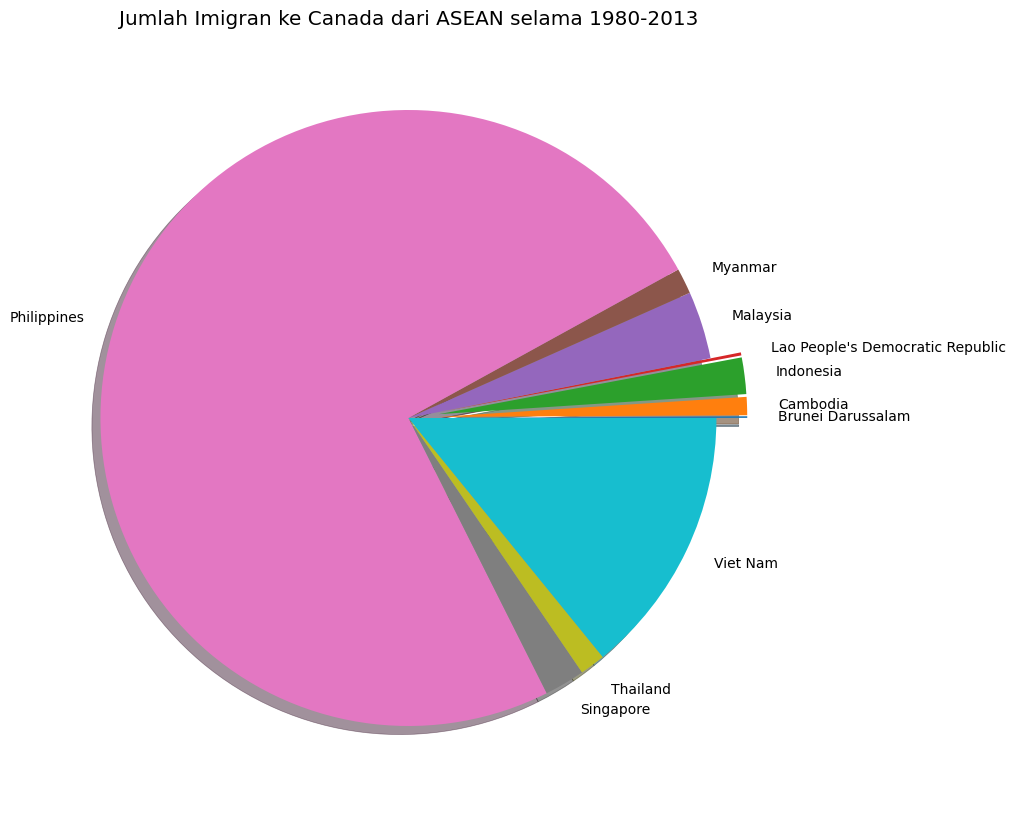

In [ ]:
df_asean_total.plot(kind="pie",
                    figsize=(10,10),
                    colors=["tab:blue","tab:orange","tab:green","tab:red","tab:purple",
                            "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"],
                    explode=[0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0],
                    shadow=True)

plt.title("Jumlah Imigran ke Canada dari ASEAN selama 1980-2013")
plt.show()

dari ASEAN majoritas imigran yang ke Canada berasal dari Philippines

# Scatter Plot

scatter plot berbeda dengan 4 jenis chart sebelumnya (line, bar, area, pie)

scatter plot bukan untuk cari trend (line), bukan untuk perbandingan angka antar kategori (bar), juga bukan untuk perbandingan dari sebuah total (pie)

scatter plot kita gunakan untuk melihat apakah ada korelasi antara 2 kategori.

Misalkan, apakah ada korelasi antara jumlah imigran dari Indonesia dan dari Singapore? kalau jumlah imigran Indonesia meningkat, apakah Singapore juga akan meningkat?

<Axes: xlabel='Indonesia', ylabel='Singapore'>

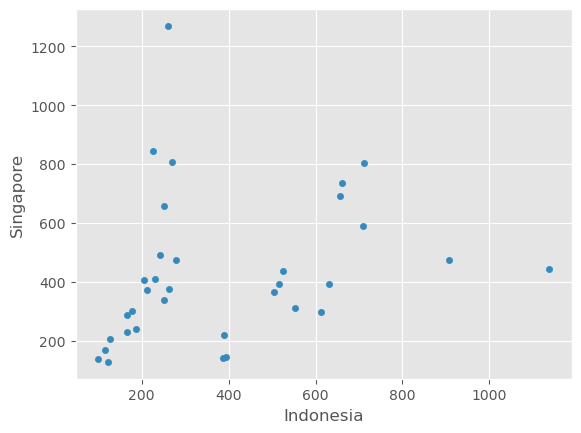

In [ ]:
df_indosg.plot(kind="scatter", x="Indonesia", y="Singapore")

dari grafik scatter plot diatas, sepertinya korelasi antara jumlah imigran kedua negara ini lemah atau tidak ada korelasi.

<Axes: xlabel='Malaysia', ylabel='Singapore'>

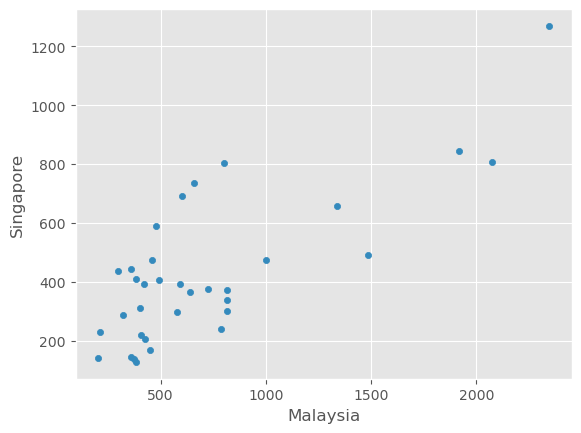

In [ ]:
# bagaimana dengan Singapore dan Malaysia
df_indosgmy.plot(kind="scatter", x="Malaysia", y="Singapore")

dari grafik diatas, terlihat ada korelasi. saat jumlah imigran Malaysia banyak, Singapore ikut banyak. saat sedikit, Singapore ikut sedikit. Ini dinamakan korelasi positif. sama2 naik, sama2 turun.

Ada juga data korelasi negatif, dimana saat satu naik, satunya lagi turun. Misalkan datanya seperti itu, tetap ada korelasi, tapi negatif.

In [ ]:
# kita bisa lihat korelasi lainnya, misalkan Philipine dengan Viet Nam
df_phvt = df_can2.loc[["Viet Nam", "Philippines"], years].T
df_phvt.head()

Country,Viet Nam,Philippines
1980,1191,6051
1981,1829,5921
1982,2162,5249
1983,3404,4562
1984,7583,3801


<Axes: xlabel='Viet Nam', ylabel='Philippines'>

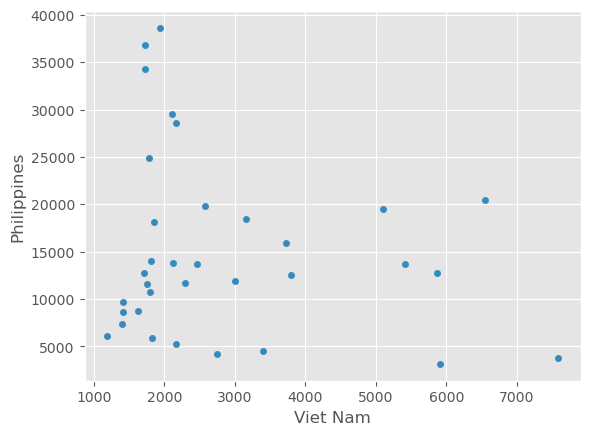

In [ ]:
df_phvt.plot(kind="scatter", x="Viet Nam", y="Philippines")

# Box Plot
Box Plot lebih ke arah teknis, kita gunakan untuk mencari rangkuman "tengah" dan "penyebaran" data

biasanya berapa jumlah imigran Indonesia ke Canada? angka ini konsisten, atau punya penyebaran yang tinggi? biasanya 200 +- 20 atau 200 +- 200

Box Plot menggunakan 5 angka yang bisa kita cari dengan teknik statistik:
- pembatas outlier bawah
- Q1
- Median atau Q2
- Q3
- pembatas outlier atas

outlier adalah data yang jauhh beda sendiri dari data lainnya. misalnya biasanya 200an, tiba2 naik ke 2000, itu termasuk outlier.

Median adalah titik tengah data, misalnya dari data [0,2,3,-5,10,5,7] tengahnya berapa? kita urutkan dulu dari kecil ke besar [-5, 0, 2, 3, 5, 7, 10] dan kita lihat titik tengahnya yaitu dari jumlah angka kita (ada 7) maka tengah adalah angka ke-4. di dataset ini angka ke-4 adalah 3. jadi median adalah 3. Q2 Quartile dua adalah 3.

In [ ]:
# contoh kita mau lihat data imigrasi dari Indonesia
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


<Axes: >

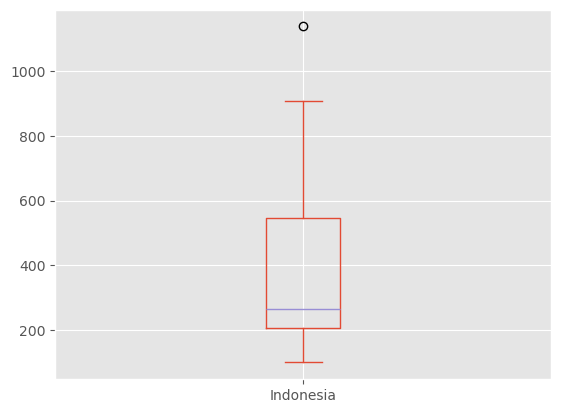

In [ ]:
df_indo.plot(kind="box")

titik bulat diatas itu adalah outlier. ada 1 outlier di data kita. karena cuma 1 kita bisa yakin itu angka tertinggi sendiri, max value. bisa dilihat menggunakan describe max nya ada di 1138.

whisker atau kumis boxplot menunjukkan angka terakhir yang belum menjadi outlier. angka terakhir terkecil dan terbesar.

garis tengahnya menunjukkan median, atau titik tengah dari dataset kita. 50% data ada di bawah garis ini valuenya, 50% ada di atas.

box nya sendiri, garis atas box adalah titik 75%. jadi 25% data lebih besar value nya daripada garis Q3 (75%) kita, atau data imigrasi Indonesia kita, 25% ada di atas 545.25.

untuk garis bawah box, itu penanda 25%. jadi ada 25% data yang dibawah garis ini.

jadi, box nya, adalah representasi 50% dari seluruh dataset kita.

In [ ]:
df_indo.describe()

Country,Indonesia
count,34.000000
mean,386.764706
std,251.233449
min,100.000000
25%,207.000000
50%,266.000000
75%,545.250000
max,1138.000000


<Axes: >

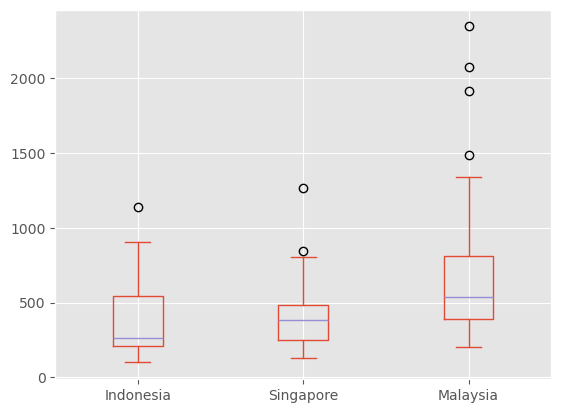

In [ ]:
# kita coba buat boxplot untuk 3 negara kita indo sg my
df_indosgmy.plot(kind="box")

dengan cepat kita bisa melihat kalau penyebaran jumlah imigran Singapore paling kecil. Median nya lebih tinggi dari Indonesia, dan dia juga lebih konsisten dengan jumlah imigran dari tahun ke tahun. Malaysia jumlah imigran lebih besar dari kedua negara lainnya, biasanya, median nya paling tinggi, dan box nya posisinya juga lebih tinggi.

## Recap

LINE CHART - graph yang digunakan untuk melihat tren perubahan data, bisa seiring waktu, atau seiring interval lainnya.

BAR CHART - melihat perbandingan antara kategori berbeda, atau melihat tren perubahan data dengan skala data yang terlihat.

AREA PLOT - melihat tren kumulatif, total dari beberapa kategori, perubahan seiring waktu. juga bisa digunakan sebagai gabungan line chart dan bar chart, kita perlu minta jangan di stack.

---

Pie Chart - membandingkan proporsi per kategori dari sebuah total. total ASEAN, masing2 negara berapa. total dunia, masing2 kontinen berapa. total penjualan bulan ini, masing2 sales berapa bagiannya.

---

Scatter Plot - melihat korelasi antara dua kategori. apakah ada hubungan positif/ negatif/ tidak ada hubungan antara dua kategori. misalnya jumlah sales Budi dan Andi, ada korelasi atau tidak?

Box Plot - melihat "tengah" dan "penyebaran" sekelompok data.

# Histogram

Frekuensi - seberapa sering sebuah kejadian terjadi. Count untuk berapa kali x terjadi. Ada berapa data yang masuk ke bin tertentu.

Misalkan data imigrasi Indonesia ke Canada. ada data tahun 1980, data tahun 1981, ... data tahun 2023. Total ada 34 data points. dari 34 data points, ada berapa yang masuk ke bin tertentu.

(contoh)   
- bin pertama adalah value di antara 100-200
- bin kedua adalah value di antara 200-300

dari 34 data points imigrasi Indonesia ke Canada, ada berapa yang masuk ke bin pertama. ada berapa yang masuk ke bin kedua.

dari sana, barulah kita jadikan grafik. bin pertama menjadi 1 poin di grafiknya. gambarnya secara visual seperti bar.

Jadi, histogram ini digunakan untuk memvisualisasi **distribusi** data.

Dari dataset yang kita miliki, contohnya 34 points yang kita punya, mereka terdistribusi seperti apa? apakah banyak yang di antara 100-200? banyak yang di antara 200-300? banyak yang di antara 300-400? ... nilai minimal bin adalah nilai terendah di dataset kita, nilai maksimal adalah nilai tertinggi di dataset kita, lalu kita bagi dengan rata menjadi 10 bin. bisa juga 100 bin. kita bisa pilih mau ada berapa bin.

bisanya kita mau cari bentuk akhir histogram yang memberikan informasi.

maksudnya, kalau kita punya 34 data points, kita bagi menjadi 34 bin, maka tidak ada informasi tambahan yang akan kita dapat.

<Axes: ylabel='Frequency'>

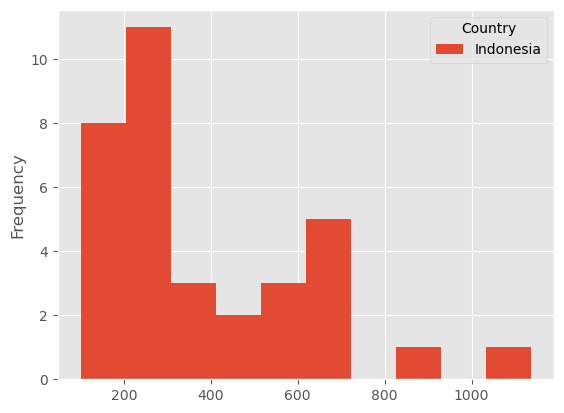

In [ ]:
# data imigrasi Indonesia
df_indo.plot(kind="hist")

secara default akan kasih 10 bin.

diatas kita bisa lihat bin kedua paling rame. bin yang ke 7,8,9,10 sedikit, antara 0 atau 1 data point yang masuk ke bin tersebut. dari histogramnya, kita bisa bilang, paling sering jumlah imigran dari Indonesia ada di bin kedua.

bin kedua itu value nya berapa, tidak terlihat di chart diatas. kita perlu minta bantuan numpy untuk edit chartnya supaya pembatas marker x-axis pas dengan masing-masing bin.

In [ ]:
np.histogram(df_indo)

(array([ 8, 11,  3,  2,  3,  5,  0,  1,  0,  1], dtype=int64),
 array([ 100. ,  203.8,  307.6,  411.4,  515.2,  619. ,  722.8,  826.6,
         930.4, 1034.2, 1138. ]))

dua set array ini adalah
1. jumlah data points di setiap bin
2. pembatas bin.

bin pertama ada di antara 100 dan 203.8

bin kedua ada di antara 203.8 dan 307.6

ada 8 data points (dari 34 yang kita punya) yang masuk ke bin pertama.

ada 11 data points yang masuk ke bin kedua.

<Axes: ylabel='Frequency'>

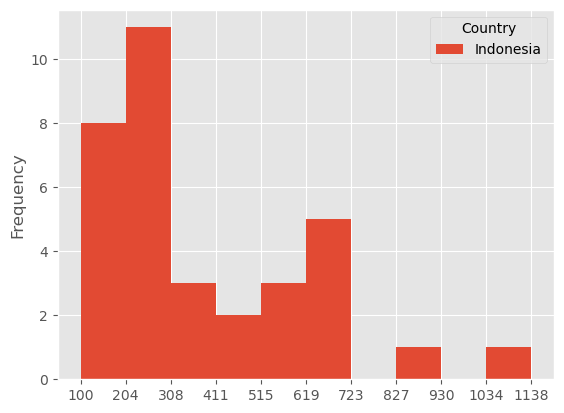

In [ ]:
count, bin_edges = np.histogram(df_indo)

df_indo.plot(kind="hist", xticks=bin_edges)

<Axes: ylabel='Frequency'>

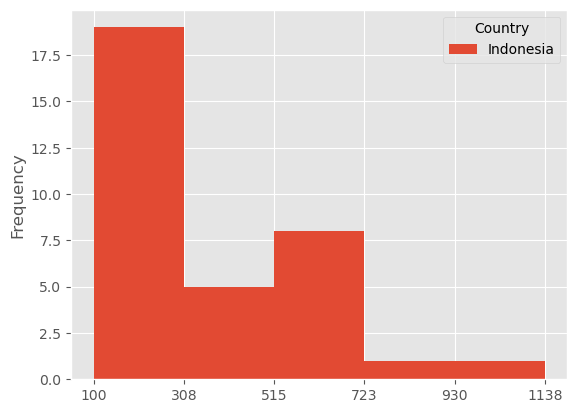

In [ ]:
# edit jumlah bin

count, bin_edges = np.histogram(df_indo, bins=5)

df_indo.plot(kind="hist", xticks=bin_edges, bins=5)

In [ ]:
# kita cobain ke data lain, misalnya data jumlah imigran per negara di tahun 2008

df_2008 = df_can2[2008]
df_2008

Country
Afghanistan       2111
Albania            560
Algeria           4005
American Samoa       0
Andorra              0
                  ... 
Viet Nam          1784
Western Sahara       0
Yemen              133
Zambia              64
Zimbabwe           611
Name: 2008, Length: 195, dtype: int64

<Axes: ylabel='Frequency'>

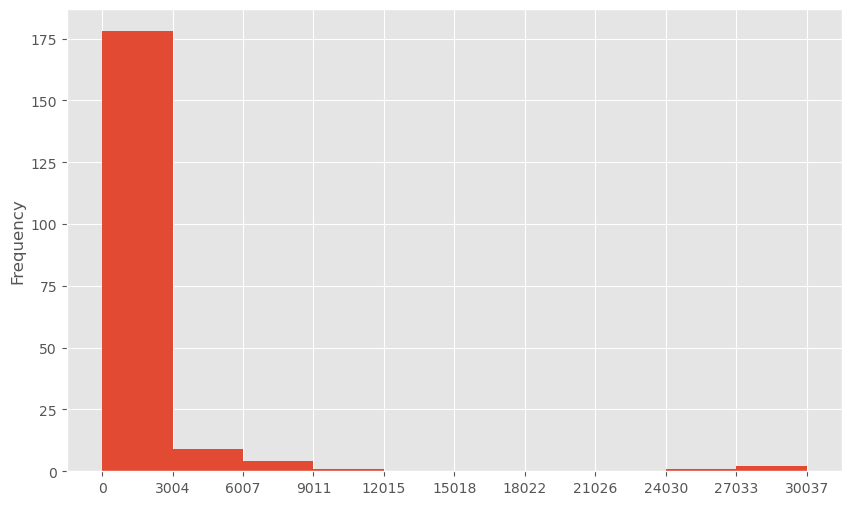

In [ ]:
# dari semua negara kita, 195 data points, di tahun 2008, biasanya pada kirim berapa orang ke Canada?

# set jumlah bin
n=10
# set source data
data = df_2008

# pakai bantuan numpy untuk minta bin_edges
count, bin_edges = np.histogram(data, bins=n)

# buat histogram dan edit marker x-axis supaya sesuai dengan bin kita
data.plot(kind="hist", xticks=bin_edges, bins=n, figsize=(10,6))

In [ ]:
print(count)

[178   9   4   1   0   0   0   0   1   2]


mayoritas negara mengirim dibawah 3004 orang di tahun 2008. Hanya ada 2 negara yang mengirim leibh dari 27033 orang.